<a href="https://colab.research.google.com/github/szymbor2/ATMS597-Project5-GroupG/blob/master/project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Set Working Directory

In [5]:
from google.colab import drive
drive.mount('/content/drive')
import glob
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LogisticRegression
!pip install wget
import wget
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import copy
from sklearn.metrics import confusion_matrix
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as pyplot
from sklearn import svm
from sklearn.metrics import brier_score_loss
from sklearn import svm
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=f4da4fbfe21f45db28b4628fd75ca91d946aa4ef4a2e4b52217c926a8e5a9c48
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
YOUR_DIRECTORY = '/content/drive/My Drive/Colab Notebooks/ATMS597/project5/'

# Get Data
<b> Get Data </b> - Once you run this and have the data, do not need to run again.

In [0]:
# years = np.arange(2000,2021)
# months = np.arange(1,13)
# for y in years:
#     print(y)
#     for m in months:
#         try:
#             wget.download('ftp://ftp.ncdc.noaa.gov/pub/data/asos-fivemin/6401-'+str(y)+'/64010KSTC'+str(y)+str(m).zfill(2)+'.dat', out=YOUR_DIRECTORY+'project5_data/')
#         except:
#             print("All current files grabbed")
#             break

<b> Reformat files to be readable as CSVs </b> - once you have this, do not need to run again.

In [0]:
# for yr in range(2000,2020):
#   print('Year = ', yr)
#   files = sorted(glob.glob(YOUR_DIRECTORY+'project5_data/64010KSTC'+str(yr)+'*.dat'))

#   for ifile in range(0,len(files)):
#       print(ifile)
#       f = open(files[ifile], 'rb')
#       df = pd.DataFrame([str(f.readline()).replace('\\n\'','').replace('b\'','').strip().split(' ')])
#       for line in f:
#           data = pd.DataFrame([str(f.readline()).replace('\\n\'','').replace('b\'','').strip().split(' ')])
#           df = pd.concat([df, data], ignore_index=True)  
#       # df = pd.DataFrame([line.strip().split(' ') for line in open(files[ifile], 'r')])
#       del df[3]
#       n_cols = len(df.columns)
#       columns = ['StnNo', 'ContainsDate', 'Time', "Interval", 'Sttn', 'UTC', 'Type', 'Wind', "Weath/Obstr", 'SkyCond', 'Temp',
#                     'n_days', 'MSLP', 'RelHum', ' ', 'WndDir/Spd', 'WindMagnetic', 'RMK', 'AO2']
#       out_name = files[ifile].replace(YOUR_DIRECTORY+'project5_data/',YOUR_DIRECTORY+'project5_data/reviewed/')
#       out = open(out_name, 'w')
#       out.write('date'+','+'timeofday'+','+'Wind'+','+'Wind_Direction'+','+'Wind_Speed'+','+'Gusts'+','+'Variable_Winds'+','+'Temperature'+','+ 
#                         'Dewpoint'+','+'rhum'+','+'hourly'+','+'sixhourly'+','+'dayprecip'+','+'solid'+','+'liquid'+'\n')
#       # new_df = pd.DataFrame(columns=new_df_columns)
#       cols_already = len(columns)
#       cols_new = []
#       cols_new = [np.append(cols_new,'X') for i in range(n_cols-cols_already)]
#       columns = np.append(columns, cols_new)
#       df.columns = columns

#       for i in range(0, np.shape(df)[0]): #np.shape(df)[0]
#           try:
#             day = df['ContainsDate'][i][-8:] 
#             time = df['Time'][i]
#             date = datetime.datetime.strptime(day+' '+time, '%m/%d/%y %H:%M:%S')
#             (h, m, s) = time.split(':')
#             timeofday = float(int(h) * 3600 + int(m) * 60 + int(s))/(3600*24)
#             # print(date)
#             # print(timeofday)
#             Gusts = 0
#             Wind = 0
#             Variable_Winds = 0
#             try:
#               if "KT" in df['Wind'][i]:
#                   Wind = 1
#                   if df['Wind'][i][0:3] == 'VRB':
#                       Variable_Winds = 1
#                   else:
#                       Variable_Winds = 0
#                       Wind_Direction = int(df['Wind'][i][0:3]) # in tens of degrees from true north
#                   Wind_Speed = int(df['Wind'][i][3:5]) # in whole knots (two digits)
#                   if df['Wind'][i][5] == 'G':
#                       Gusts = 1
#                       Gust_Speed = int(df['Wind'][i][6:8]) # speed in whole knots (two digits)
#               else:
#                   Wind = 0
#             except:
#               Wind = 0
#               Variable_Winds = 0
#               Wind_Direction = np.nan
#               Gusts=0
#               Gust_Speed=0

#             Temp = 0
#             try:
#               if "/" in df['Temp'][i]:
#                   Temp = 1
#                   Temperature = df['Temp'][i].split('/')[0]
#                   if 'M' in Temperature:
#                     Temperature = int(Temperature[1:3])
#                   else:
#                     Temperature = int(Temperature)
#                   Dewpoint = df['Temp'][i].split('/')[1]
#                   if 'M' in Dewpoint:
#                     Dewpoint = int(Dewpoint[1:3])
#                   else:
#                     Dewpoint = int(Dewpoint) 
#               else:
#                   Temp = 0  
#               try:
#                 rhum = int(df['RelHum'][i])
#               except:
#                 rhum = np.nan
#               if (rhum>100):
#                 rhum = np.nan
#             except:
#               Temp=0
#               Temperature=np.nan
#               Dewpoint=np.nan
#               rhum=np.nan

#             for n in range(cols_already, n_cols): #n_cols
#               # for j in range(len(df.iloc[:,n])):
#                 element = df.iloc[i,n]
#                 try:
#                   if element[0]=='P' or element[0]=='6' or element[0]=='7':
#                     if element[1]=='0':
#                       if element[0]=='P':
#                         hourly = float(element[1:])/100.
#                       elif element[0]=='6':
#                         sixhourly = float(element[1:])/100.
#                       elif element[0]=='7':
#                         dayprecip = float(element[1:])/100.
#                   else:
#                     hourly = np.nan
#                     sixhourly = np.nan
#                     dayprecip = np.nan
#                 except:
#                     hourly = np.nan
#                     sixhourly = np.nan
#                     dayprecip = np.nan

#             frozen_flags = ['SN', 'SG', 'IC', 'PL', 'GR', 'GS']
#             liquid_flags = ['FZ', 'RA']
#             try:
#                 if np.logical_or(any(flags in df['Weath/Obstr'][i] for flags in frozen_flags), any(flags in df['Temp'][i] for flags in frozen_flags)):
#                   solid = 1
#                 elif np.logical_or(any(flags in df['Weath/Obstr'][i] for flags in liquid_flags), any(flags in df['Temp'][i] for flags in liquid_flags)):
#                   liquid = 1
#                 else:
#                   solid = 0
#                   liquid = 0
#             except:
#                   solid = np.nan
#                   liquid = np.nan

#             # print('Wind, Wind_Direction, Wind_Speed, Gusts, Variable_Winds, Temp, Temperature, Dewpoint, rhum, hourly, sixhourly, daily:') 
#             # print(str(date)+','+str(timeofday)+','+str(Wind)+','+str(Wind_Direction)+','+str(Wind_Speed)+','+str(Gusts)+','+str(Variable_Winds)
#             # +','+str(Temperature)+','+str(Dewpoint)+','+str(rhum)+','+str(hourly)+','+str(sixhourly)+','+str(dayprecip)+','+str(solid)+','+str(liquid)+'\n')
#             out.write(str(date)+','+str(timeofday)+','+str(Wind)+','+str(Wind_Direction)+','+str(Wind_Speed)+','+str(Gusts)+','+str(Variable_Winds)
#             +','+str(Temperature)+','+str(Dewpoint)+','+str(rhum)+','+str(hourly)+','+str(sixhourly)+','+str(dayprecip)+','+str(solid)+','+str(liquid)+'\n')
#           except:
#             continue
#       out.close()


# Read in and adjust data
Drop columns we "don't care about", replace negative values of RH with NaN, and filter out all NaNs.

In [8]:
# Read in the file
data = pd.read_csv(YOUR_DIRECTORY + 'data.csv')
data['date'] = pd.to_datetime(data['date']).apply(lambda x: x.strftime('%j')) # Change date column to datetime

# Drop Columns
data.drop(columns = ['Wind', 'sixhourly', 'dayprecip', 'Gusts', 'hourly', 'solid', 'liquid', 'Variable_Winds'], inplace = True)

# Replace negative RH values with NaNs
data.loc[(data['rhum'] < 0)] = np.nan

# Drop NaNs
data = data.filter(['date','timeofday', 'Wind_direction', 'Wind_speed', 'Temperature', 'Dewpoint', 'rhum', 'prcp_type']).dropna()
data.describe()

,timeofday,Temperature,Dewpoint,rhum,prcp_type
count,6231.000000,6231.000000,6231.000000,6231.00000,6231.000000
mean,0.565615,11.670358,8.717541,80.65784,0.402664
std,0.208864,6.335851,5.753035,11.36367,0.490474
min,0.003831,1.000000,0.000000,18.00000,0.000000
25%,0.382303,7.000000,4.000000,74.00000,0.000000
50%,0.548970,12.000000,8.000000,81.00000,0.000000
75%,0.746887,16.000000,13.000000,89.00000,1.000000
max,0.996887,36.000000,25.000000,100.00000,1.000000


## Function to create climatological probability for Brier Skill Score

In [0]:
# Calculate climatology probability
def climate_probability(label, shape):
    clim = (np.size(np.where(label == 1)))/float(len(label))
    probability = np.zeros((shape))
    probability[:,0] = 1 - clim
    probability[:,1] = clim
    return probability

# 1. Logistic Regression

## Model Features and Labels

In [0]:
labels = data['prcp_type'].to_numpy() # y
feats = data.drop(columns = ['prcp_type']).to_numpy() # X
train_features, test_features, train_labels, test_labels = train_test_split(feats, labels, test_size = 0.3, random_state = 42)

## Train Model

In [54]:
clf = LogisticRegression(max_iter=10e10, random_state=42)
clf.fit(train_features, train_labels)

training_probability = clf.predict_proba(train_features)
testing_probability = clf.predict_proba(test_features)

print('Training Score: ' + str(clf.score(train_features, train_labels)))
print('Testing Score: ' + str(clf.score(test_features, test_labels)))

print('Training Brier Score: ' + str(brier_score_loss(train_labels, clf.predict(train_features))))
print('Testing Brier Score: ' + str(brier_score_loss(test_labels, clf.predict(test_features))))

Training Score: 0.7984407246044485
Testing Score: 0.7818181818181819
Training Brier Score: 0.2015592753955515
Testing Brier Score: 0.21818181818181817


## Brier Skill Score

In [56]:
training_climprob = climate_probability(train_labels, np.shape(training_probability))
testing_climprob = climate_probability(test_labels, np.shape(testing_probability))

# Calculate the Brier Skill Score for training and testing data
training_bss = 1 - (brier_score_loss(train_labels, training_probability[:,1])/brier_score_loss(train_labels, training_climprob[:,1]))
testing_bss = 1 - (brier_score_loss(test_labels, testing_probability[:,1])/brier_score_loss(test_labels, testing_climprob[:,1]))

print('Training Brier Skill Score: ' + str(training_bss))
print('Testing Brier Skill Score: ' + str(testing_bss))

Training Brier Skill Score: 0.45903779615265305
Testing Brier Skill Score: 0.42380805369114083


## Confusion Matrix

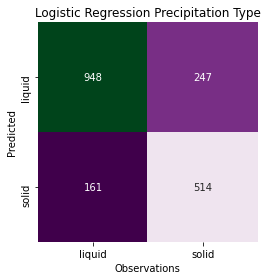

In [57]:
# Create Matrix
matrix = confusion_matrix(test_labels, clf.predict(test_features))

# Plot matrix
labels = ['liquid', 'solid']
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels, cmap='PRGn')
pyplot.title('Logistic Regression Precipitation Type')
pyplot.xlabel('Observations')
pyplot.ylabel('Predicted')
pyplot.tight_layout()
pyplot.savefig(YOUR_DIRECTORY + 'logregression_confmatrix.png', dpi=300)

# 2. Random Forest Regression

## Train Model

In [58]:
#rfc = RandomForestClassifier(n_estimators = 1600, random_state = 42, max_depth = 80, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 3, bootstrap = True)
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfc.fit(train_features, train_labels)

training_probability = rfc.predict_proba(train_features)
testing_probability = rfc.predict_proba(test_features)

print('Training Score: ' + str(rfc.score(train_features, train_labels)))
print('Testing Score: ' + str(rfc.score(test_features, test_labels)))

print('Training Brier Score: ' + str(brier_score_loss(train_labels, rfc.predict(train_features))))
print('Testing Brier Score: ' + str(brier_score_loss(test_labels, rfc.predict(test_features))))

Training Score: 1.0
Testing Score: 0.9871657754010695
Training Brier Score: 0.0
Testing Brier Score: 0.012834224598930482


## Brier Skill Score

In [59]:
training_climprob = climate_probability(train_labels, np.shape(training_probability))
testing_climprob = climate_probability(test_labels, np.shape(testing_probability))

# Calculate the Brier Skill Score for training and testing data
training_bss = 1 - (brier_score_loss(train_labels, training_probability[:,1])/brier_score_loss(train_labels, training_climprob[:,1]))
testing_bss = 1 - (brier_score_loss(test_labels, testing_probability[:,1])/brier_score_loss(test_labels, testing_climprob[:,1]))

print('Training Brier Skill Score: ' + str(training_bss))
print('Testing Brier Skill Score: ' + str(testing_bss))

Training Brier Skill Score: 0.9921434622784686
Testing Brier Skill Score: 0.9495034036416893


## Create Matrix

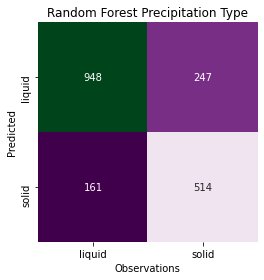

In [60]:
# Create Matrix
matrix = confusion_matrix(test_labels, clf.predict(test_features))

# Plot matrix
labels = ['liquid', 'solid']
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels, cmap='PRGn')
pyplot.title('Random Forest Precipitation Type')
pyplot.xlabel('Observations')
pyplot.ylabel('Predicted')
pyplot.tight_layout()
pyplot.savefig(YOUR_DIRECTORY + 'randforestregress_confmatrix.png', dpi=300)

## 3. SVM

## Train Model

In [51]:
svmc = svm.SVC()
svmc.fit(train_features, train_labels)

print('Training Score: ' + str(svmc.score(train_features, train_labels)))
print('Testing Score: ' + str(svmc.score(test_features, test_labels)))

print('Training Brier Score: ' + str(brier_score_loss(train_labels, svmc.predict(train_features))))
print('Testing Brier Score: ' + str(brier_score_loss(test_labels, svmc.predict(test_features))))

Training Score: 0.8993350149048384
Testing Score: 0.895187165775401
Training Brier Score: 0.10066498509516165
Testing Brier Score: 0.10481283422459893


## Confusion Matrix

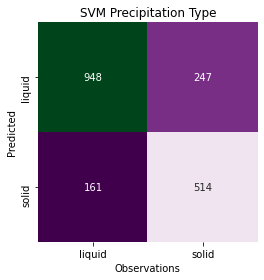

In [49]:
# Create Matrix
matrix = confusion_matrix(test_labels, clf.predict(test_features))

# Plot matrix
labels = ['liquid', 'solid']
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels, cmap='PRGn')
pyplot.title('SVM Precipitation Type')
pyplot.xlabel('Observations')
pyplot.ylabel('Predicted')
pyplot.tight_layout()
pyplot.savefig(YOUR_DIRECTORY + 'svm_confmatrix.png', dpi=300)